Lesson 07 Assignment 
Author: Ajai Shukla
    
Instructions:

It is recommended you complete the lab exercises for this lesson before beginning the assignment.

Using the Abalone csv file,  create a new notebook to build an experiment using support vector machine classifier and regression. Perform each of the following tasks and answer the questions:

    Convert the continuous output value from continuous to binary (0,1) and build an SVC
    Using your best guess for hyperparameters and kernel, what is the percentage of correctly classified results?
    Test different kernels and hyperparameters or consider using sklearn.model_selection.SearchGridCV. Which kernel performed best with what settings?
    Show recall, precision and f-measure for the best model
    Using the original data, with rings as a continuous variable, create an SVR model
    Report on the predicted variance and the mean squared error

In [1]:
import pandas as pd
import numpy as np
'''Importing SVM from SK-Learn'''
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
''' SK-Learn Library Import'''
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning 
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix
import sklearn.datasets 

In [2]:
abalone_data = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
names =  ["Sex", "Length", "Diameter", "Height", 
          "Whole Weight", "Shucked Weight", "Viscera Weight", 
          "Shell Weight", "Rings"]
abalone_df = pd.read_csv(abalone_data, 
                      header=None, 
                      names = names)

In [3]:
abalone_df.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Pairplot of Abalone Data with Hue equal to sex (M, F, I)

In [4]:
import seaborn as sns
%matplotlib inline

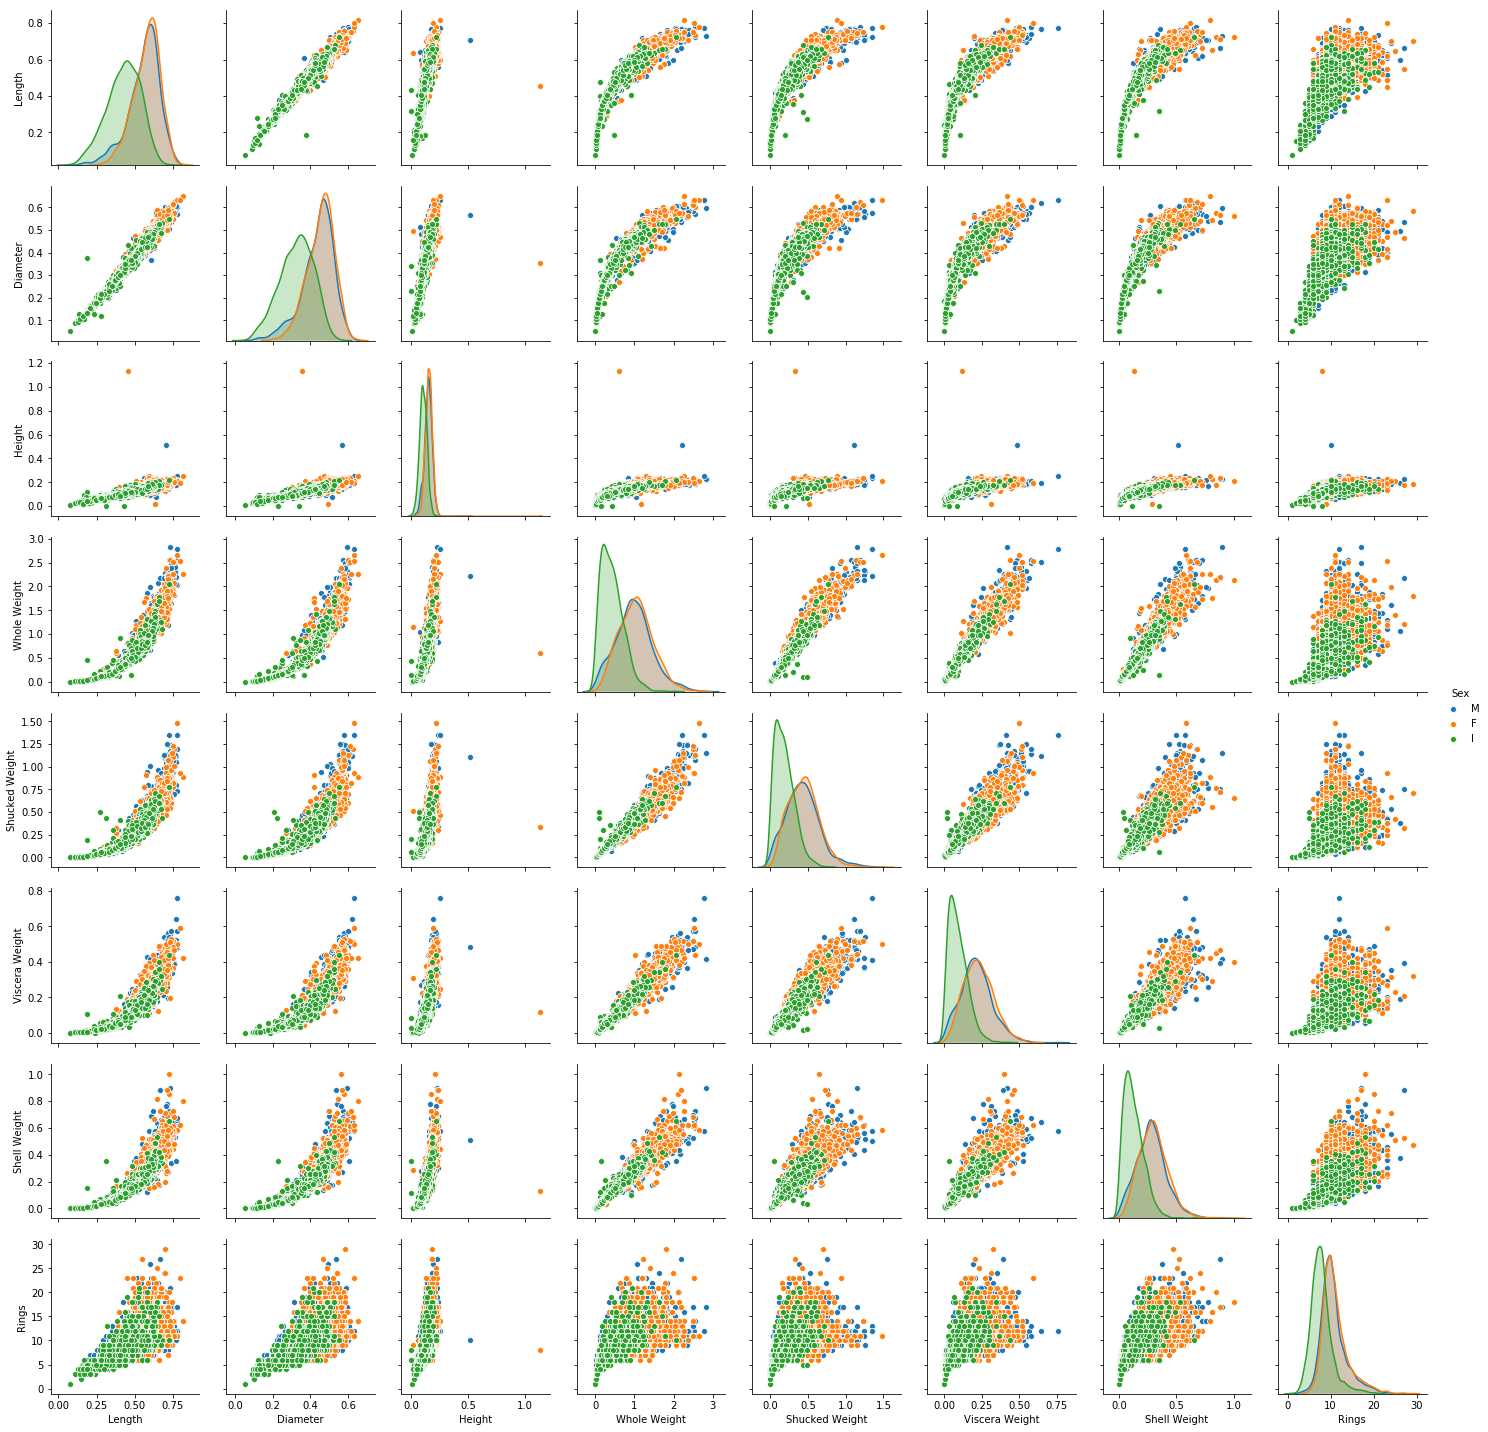

In [5]:
sns.pairplot(data=abalone_df, hue="Sex")

# Convert the continuous output value from continuous to binary (0,1) and build an SVC

In [6]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression

In [7]:
'''LabelEnconding the Categorical Data'''
abalone_df['Sex'] = LabelEncoder().fit_transform(abalone_df['Sex'].tolist())

In [8]:
'''One Hot Encoding for Sex Feature '''
transformed_sex_feature = OneHotEncoder().fit_transform(abalone_df['Sex'].values.reshape(-1,1)).toarray()
df_sex_encoded = pd.DataFrame(transformed_sex_feature, columns = ["Sex_"+str(int(i)) for i in range(transformed_sex_feature.shape[1])])
abalone_df = pd.concat([abalone_df, df_sex_encoded], axis=1)

C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [9]:
abalone_df.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings,Sex_0,Sex_1,Sex_2
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0.0,0.0,1.0
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0.0,0.0,1.0
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1.0,0.0,0.0
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0.0,0.0,1.0
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0.0,1.0,0.0


Data Splitting for Model

Learning Features
Predicting Feature
Train & Test Split

In [10]:
'''Learning Features and Predicting Features'''
Xtrain = abalone_df.drop(['Rings' ,'Sex'], axis = 1)
Ytrain = abalone_df['Rings']

In [11]:
# Split Data into Test and Training Set
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

In [12]:
'''Creating Object of LogisticRegression'''
logreg = LogisticRegression()
'''Learning from Training Set'''
logreg.fit(X_train, Y_train)
'''Predicting for Training Set'''
Y_pred = logreg.predict(X_test)
'''Accuracy Score'''
result_acc = accuracy_score(Y_test,Y_pred)

C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [13]:
'''For Both, LabelEncoding and OneHotEncoding -> The accuracy is 25 %'''
result_acc

0.25525743292240755

build an SVC

In [14]:
y = abalone_df["Sex"]
x = abalone_df.drop("Sex", axis=1)
x.head()

# Support Vector Classifier (SVM/SVC)
from sklearn.svm import SVC
svc = SVC(gamma=0.0001)
svc.fit(x, y)
svc.score(x,y)

0.6001915250179555

# Train on split data (Fixed some overfitting)

In [16]:
svc = SVC(gamma=0.0001)
svc.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
svc.score(X_test,Y_test)

0.1660623640319072

# Using your best guess for hyperparameters and kernel, what is the percentage of correctly classified results?

Set the hyperparameters

In [ ]:
gamma = 'scale'

Try Kernels

In [87]:
svmModel = svm.SVC(kernel='rbf', C=1, gamma=100) 
'''Learning from Training Set'''
svmModel.fit(X_train, Y_train)
'''Predicting for Training Set'''
Y_pred = svmModel.predict(X_test)
'''Accuracy Score'''
result_acc = accuracy_score(Y_test,Y_pred) 

In [88]:
result_acc

0.27918781725888325

In [93]:
def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

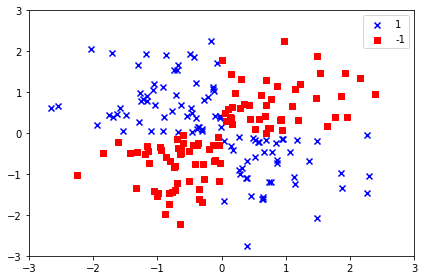

In [94]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


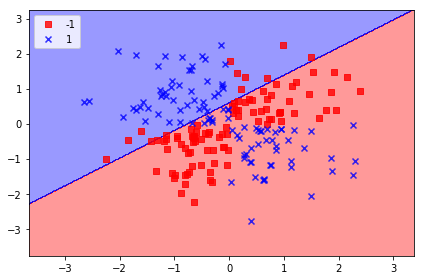

In [95]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings
# Create a SVC classifier using a linear kernel
svm = SVC(kernel='linear', C=1, random_state=0)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Test different kernels and hyperparameters or consider using sklearn.model_selection.SearchGridCV. Which kernel performed best with what settings?

Gamma = 0.01

In the case of our SVC classifier and data, when using a low gamma like 0.01, the decision boundary is not very ‘curvy’, rather it is just one big sweeping arch.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


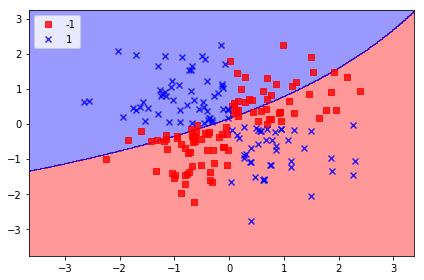

In [96]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=.01, C=1)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Gamma = 1.0
You can see a big difference when we increase the gamma to 1. Now the decision boundary is starting to better cover the spread of the data.

In [101]:
gamma = 'scale'

In [103]:
from sklearn import svm, metrics
from sklearn.metrics import classification_report

# Test a LinearSVC
clf1 = svm.LinearSVC(max_iter=5000).fit(X_train, Y_train)
clf1.predict(X_test)
print("LinearSVC")
print(classification_report(clf1.predict(X_test), Y_test))

# Test linear, rbf and poly kernels
for k in ('linear', 'rbf', 'poly'):
    clf = svm.SVC(gamma=gamma, kernel=k).fit(X_train, Y_train)
    clf.predict(X_test)
    print(k)
    print(classification_report(clf.predict(X_test), Y_test))

LinearSVC
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.48      0.50      0.49        20
           5       0.00      0.00      0.00         0
           6       0.42      0.28      0.33       126
           7       0.19      0.37      0.26        75
           8       0.45      0.28      0.35       283
           9       0.44      0.23      0.31       426
          10       0.29      0.23      0.26       264
          11       0.25      0.27      0.26       140
          12       0.00      0.00      0.00         6
          13       0.07      0.10      0.08        39
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         0
          18       0.00      0.00      0.00         0
          19       0.00      0.00      0.00         0
          20     

C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


linear


C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.52      0.26      0.35       171
           7       0.31      0.37      0.34       118
           8       0.39      0.34      0.36       207
           9       0.41      0.23      0.30       402
          10       0.49      0.22      0.30       481
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         0
          18       0.00      0.00      0.00         0
          19       0.00      0.00      0.00         0
          20       0.00    

C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         0
           6       0.48      0.26      0.34       151
           7       0.22      0.35      0.27        88
           8       0.36      0.37      0.37       171
           9       0.57      0.24      0.33       549
          10       0.37      0.25      0.30       307
          11       0.23      0.31      0.26       112
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         0
          18       0.00      0.00      0.00         0
          19       0.00      0.00      0.00         0
          20       0.00    

C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


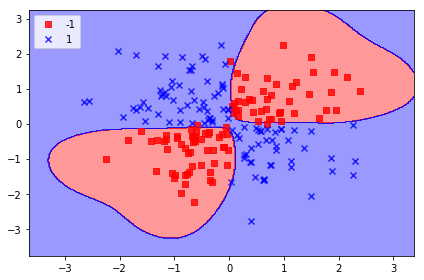

In [97]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=1, C=1)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Gamma = 10.0

At gamma = 10 the spread of the kernel is less pronounced. The decision boundary starts to be highly effected by individual data points (i.e. variance).

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


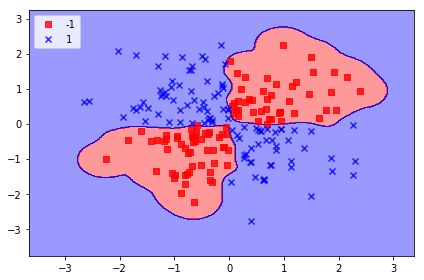

In [98]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=10, C=1)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Test different kernels and hyperparameters or consider using sklearn.model_selection.SearchGridCV. Which kernel performed best with what settings?

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [19]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=300, random_state=0)

In [20]:
grid_param = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

In [21]:
gd_sr = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

In [22]:
gd_sr.fit(X_train, Y_train)

C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=300, n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootst

In [23]:
best_parameters = gd_sr.best_params_
print(best_parameters)

{'bootstrap': True, 'criterion': 'gini', 'n_estimators': 500}


In [24]:
best_result = gd_sr.best_score_
print(best_result)

0.2544674767691208


# Show recall, precision and f-measure for the best model

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logmodel = LogisticRegression()
logmodel.fit(X_train, Y_train)

C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
predictions = logmodel.predict(X_test)

In [27]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00        50
           6       0.23      0.26      0.24        84
           7       0.41      0.26      0.32       144
           8       0.27      0.46      0.34       179
           9       0.23      0.45      0.31       229
          10       0.23      0.33      0.27       213
          11       0.28      0.24      0.26       155
          12       0.00      0.00      0.00        88
          13       0.00      0.00      0.00        61
          14       0.00      0.00      0.00        37
          15       0.00      0.00      0.00        34
          16       0.00      0.00      0.00        21
          17       0.00      0.00      0.00        17
          18       0.00      0.00      0.00        15
          19       0.00      0.00      0.00         9
          20       0.00    

C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [28]:
print(confusion_matrix(Y_test, predictions))

[[  0   0   0   3   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0  19   2   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0  35   9   5   1   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0  22  26  24  11   1   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0  10  37  58  37   2   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   5   3  83  72  14   2   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   1   7  65 103  47   6   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   3  27  90  70  23   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   3  18  44  53  37   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   0  10  37  29  12   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   1   0   8  14  24  14   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   0

In [29]:
'''Creating Object of LogisticRegression'''
logreg = LogisticRegression()
'''Learning from Training Set'''
logreg.fit(X_train, Y_train)
'''Predicting for Training Set'''
Y_pred = logreg.predict(X_test)
'''Accuracy Score'''
result_acc = accuracy_score(Y_test,Y_pred) 

C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [30]:
result_acc

0.25525743292240755

# Using the original data, with rings as a continuous variable, create an SVR model
Note : If you have Binary Classification, Logistic Regression is able to Boost to Higher Accuracy
So to Handle Multi-Class Classification, We can Try SVM Model, as it works well for multi-class and multi-label Classification
Multi-Class Classification : When you have one target Column with 3 or more discreet values to predict, you state the problem as multi-class classification.
We WIll first try with all the 28 classes in the target column, using linear kernel , Regularization parameter value as 1, and gamma 1

In [31]:
'''Importing SVM from SK-Learn'''
from sklearn import svm

In [33]:
'''Learning Features and Predicting Features'''
Xtrain = abalone_df.drop(['Rings','Sex'], axis = 1)
Ytrain = abalone_df['Rings']

In [34]:
'''Train Test Split , 70:30 Ratio'''
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

In [35]:
'''Creating Object of SVM'''
svmModel = svm.SVC(kernel='linear', C=1, gamma=1) 
'''Learning from Training Set'''
svmModel.fit(X_train, Y_train)
'''Predicting for Training Set'''
Y_pred = svmModel.predict(X_test)
'''Accuracy Score'''
result_acc = accuracy_score(Y_test,Y_pred) 

In [36]:
result_acc

0.25888324873096447

We can see, the Model Accuracy has increased with SVM, it is now 37 percent.
Lets Try to tweak the model Learning Process and see if the accuracy is increases or not.

In [37]:
'''Making a Copy of the primary DataSet'''
new_df = abalone_df.copy()

In [38]:
'''Feature Engineering , class 1 - 1-8, class 2 - 9-8, class 3 - 11 >'''
new_df['newRings_1'] = np.where(abalone_df['Rings'] <= 8,1,0)
new_df['newRings_2'] = np.where(((abalone_df['Rings'] > 8) & (abalone_df['Rings'] <= 10)), 2,0)
new_df['newRings_3'] = np.where(abalone_df['Rings'] > 10,3,0)

In [39]:
new_df['newRings'] = new_df['newRings_1'] + new_df['newRings_2'] + new_df['newRings_3']

In [41]:
'''Learning Features and Predicting Features'''
Xtrain = new_df.drop(['Rings','Sex','newRings_1','newRings_2','newRings_3'], axis = 1)
Ytrain = new_df['newRings']

In [42]:
result_acc

0.25888324873096447

Report on the predicted variance and the mean squared error

In [46]:
from sklearn.tree import DecisionTreeRegressor
# create an estimator, optionally specifying parameters
model = DecisionTreeRegressor()
# fit the estimator to the data
model.fit(X_train, Y_train)
# apply the model to the test and training data
predicted_test_y = model.predict(X_test)
predicted_train_y = model.predict(X_train)



We can visualize the results with a scatter-plot of the true number of rings against the predicted number of rings:

In [73]:
def scatter_y(Y_true, predicted_y):
    """Scatter-plot the predicted vs true number of rings
    
    Plots:
       * predicted vs true number of rings
       * perfect agreement line
       * +2/-2 number dotted lines

    Returns the root mean square of the error
    """
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(Y_true, predicted_y, '.k')
    
    ax.plot([0, 30], [0, 30], '--k')
    ax.plot([0, 30], [2, 32], ':k')
    ax.plot([2, 32], [0, 30], ':k')
    
    rms = (Y_true - predicted_y).std()
    
    ax.text(25, 3,
            "Root Mean Square Error = %.2g" % rms,
            ha='right', va='bottom')

    ax.set_xlim(0, 30)
    ax.set_ylim(0, 30)
    
    ax.set_xlabel('True number of rings')
    ax.set_ylabel('Predicted number of rings')
    
    return rms

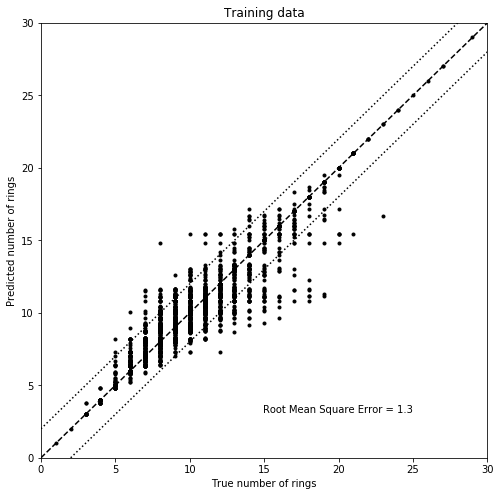

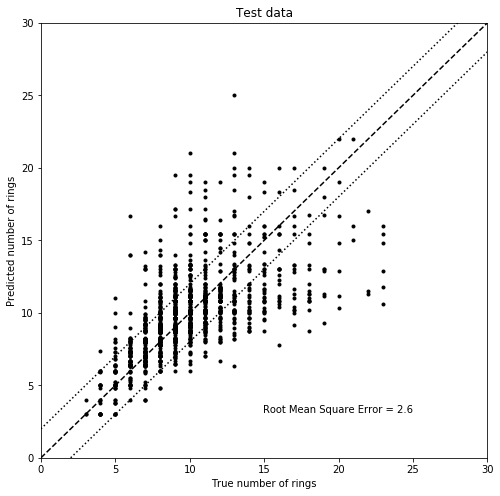

In [74]:
scatter_y(Y_train, predicted_train_y)
plt.title("Training data")
scatter_y(Y_test, predicted_test_y)
plt.title("Test data");



In [75]:
model = DecisionTreeRegressor(max_depth=10)
# fit the estimator to the data
model.fit(X_train, Y_train)
# apply the model to the test and train data
predicted_test_y = model.predict(X_test)
predicted_train_y = model.predict(X_train)

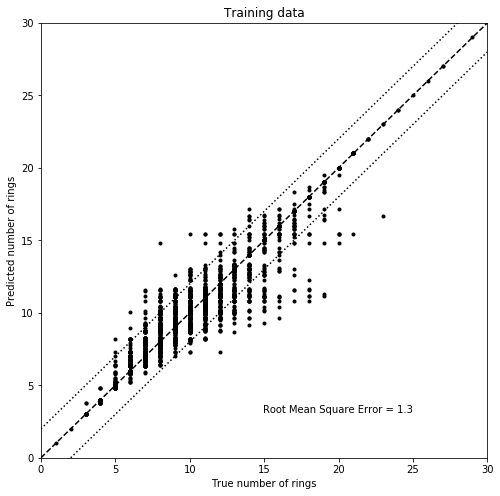

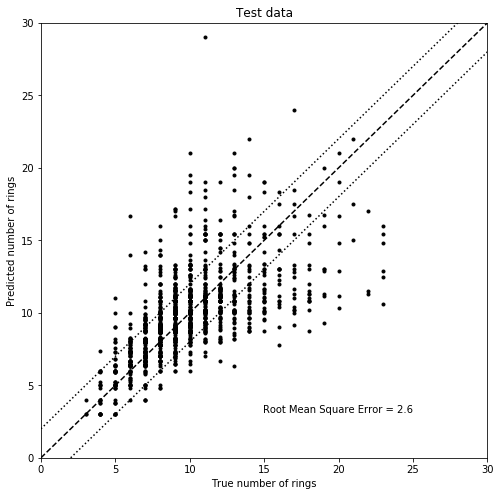

In [76]:
scatter_y(Y_train, predicted_train_y)
plt.title("Training data")
rms_decision_tree = scatter_y(Y_test, predicted_test_y)
plt.title("Test data");


sklearn has a very consistent interface, for any estimator, call fit for training then predict to estimate.

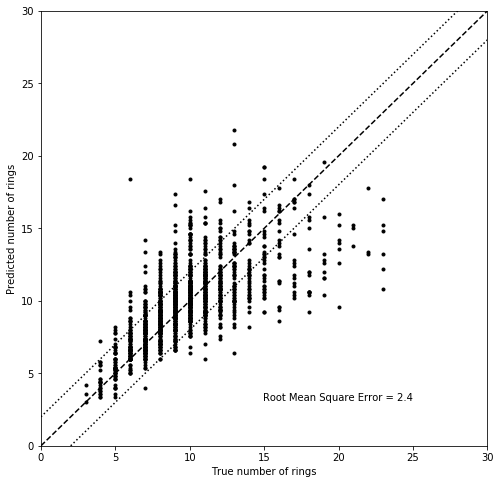

In [85]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=5)
model.fit(X_train, Y_train)
predicted_test_y = model.predict(X_test)
rms_random_forest = scatter_y(Y_test, predicted_test_y)

In [86]:
print("Root Mean Square error decreases from %.2g to %.2g." % (rms_decision_tree, rms_random_forest))

Root Mean Square error decreases from 2.6 to 2.4.
